Data Preprocessing

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [113]:
#importing datasets
train_data = pd.read_excel(r"Data_Train.xlsx")

In [114]:
pd.set_option('display.max_columns', None)

In [115]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
1,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
2,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
3,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759
4,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840


In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [117]:
train_data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
4h 10m       1
28h 30m      1
31h 30m      1
42h 45m      1
13h 35m      1
Name: count, Length: 368, dtype: int64

In [118]:
train_data.dropna(inplace=True)

In [119]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [120]:
train_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [121]:
train_data.shape

(10682, 11)

EDA Part

In [122]:
train_data["Journey_Day"] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
#converting Date_of_Journey from String to Integer 
#Journey_Day == DD part

In [123]:
train_data["Journey_Month"] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month
#converting Date_of_Journey from String to Integer 
#Journey_Month == MM part

In [124]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3
1,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3
2,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759,3,4
3,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759,27,3
4,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3


In [125]:
train_data.drop(['Date_of_Journey'], axis = 1, inplace = True )
#Dropping Date_of_Journey since we converted it from String to Integer

In [126]:
#Doing it similarly for Departure Time from String to Integer

#Extracting Hours
train_data['Dep_Hour'] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

#Extracting Minutes
train_data['Dep_Min'] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

#After extracting Departure time from String to Integer, drop the column Dep_Time
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\3844835442.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_Hour'] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\3844835442.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_Min'] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [127]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3,22,45
1,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3,22,45
2,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,1h 30m,non-stop,No info,1759,3,4,22,45
3,SpiceJet,Mumbai,Hyderabad,BOM → HYD,07:05,1h 20m,non-stop,No info,1759,27,3,5,45
4,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3,2,55


In [128]:
#Doing it similarly for Arrival Time from String to Integer

#Extracting Hours
train_data['Arr_Hour'] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

#Extracting Minutes
train_data['Arr_Min'] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

#After extracting Arrival time from String to Integer, drop the column Dep_Time
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\798108638.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arr_Hour'] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\798108638.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arr_Min'] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute


In [129]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,SpiceJet,Mumbai,Hyderabad,BOM → HYD,1h 25m,non-stop,No info,1759,21,3,22,45,0,10
1,SpiceJet,Mumbai,Hyderabad,BOM → HYD,1h 25m,non-stop,No info,1759,27,3,22,45,0,10
2,SpiceJet,Mumbai,Hyderabad,BOM → HYD,1h 30m,non-stop,No info,1759,3,4,22,45,0,15
3,SpiceJet,Mumbai,Hyderabad,BOM → HYD,1h 20m,non-stop,No info,1759,27,3,5,45,7,5
4,Jet Airways,Mumbai,Hyderabad,BOM → HYD,1h 30m,non-stop,In-flight meal not included,1840,27,3,2,55,4,25


In [130]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [131]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [132]:
#Dropping Duration Column from train_data
train_data.drop(["Duration"], axis = 1, inplace = True)

In [133]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,22,45,0,10,1,25
1,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,22,45,0,10,1,25
2,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,3,4,22,45,0,15,1,30
3,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,5,45,7,5,1,20
4,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,1840,27,3,2,55,4,25,1,30


Handling Categorical Data

In [134]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

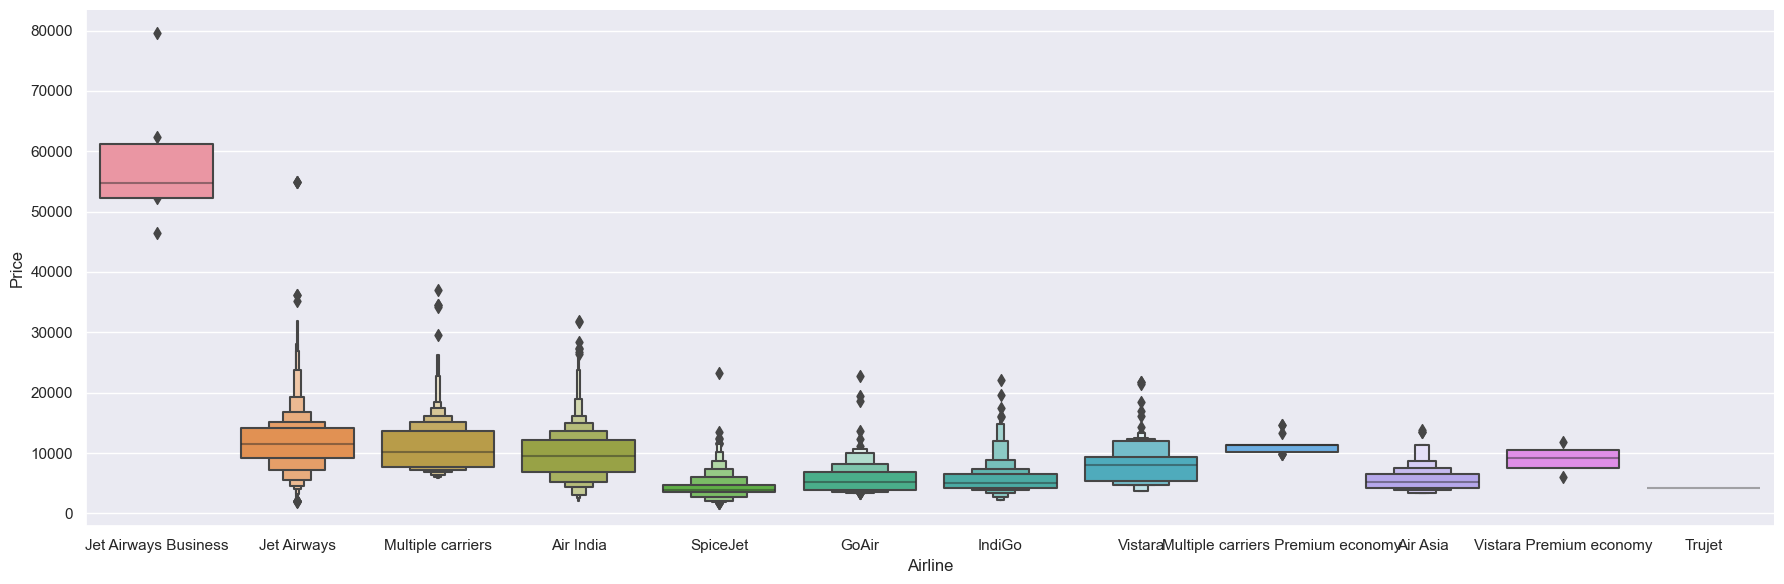

In [135]:
#Airline VS Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [136]:
Airline = train_data['Airline']
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [137]:
train_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

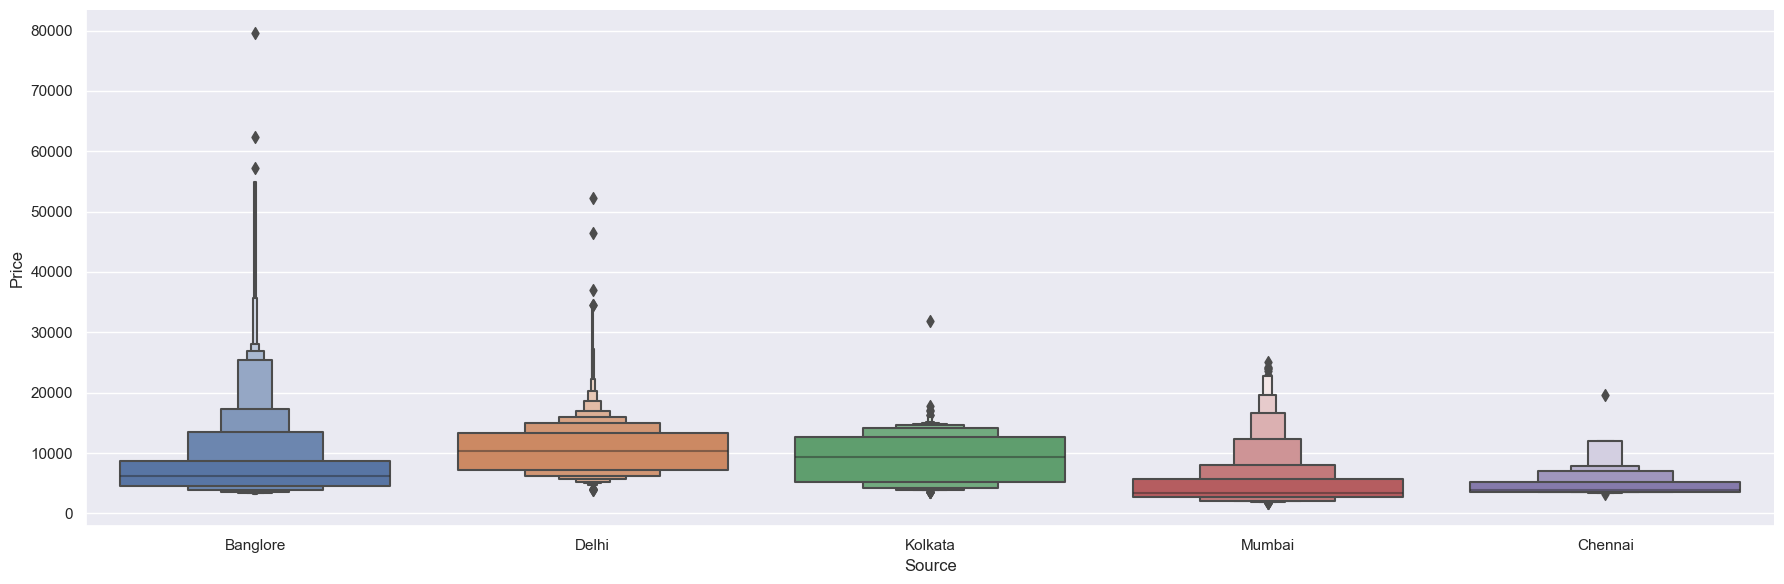

In [138]:
#Source VS Price
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [139]:
Source = train_data['Source']
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [140]:
train_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

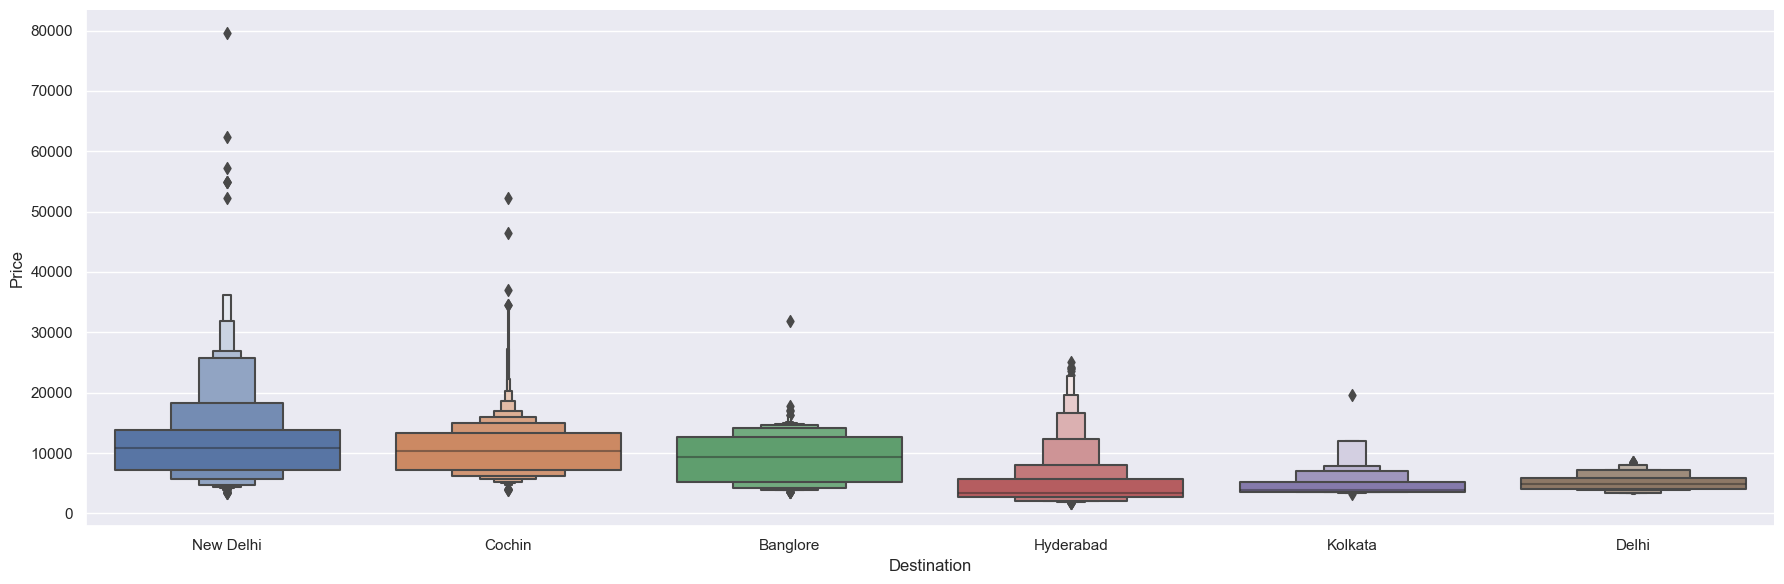

In [141]:
#Destination VS Price
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [142]:
Destination = train_data['Destination']
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [143]:
train_data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → COK → MAA → HYD       1
CCU → IXA → BLR             1
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
BOM → DED → DEL → HYD       1
Name: count, Length: 128, dtype: int64

In [144]:
train_data.drop(['Additional_Info', 'Route'], axis = 1, inplace = True)

In [145]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [146]:
train_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4})
#replaceing no. of stops which is String with Integers

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,SpiceJet,Mumbai,Hyderabad,0,1759,21,3,22,45,0,10,1,25
1,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,22,45,0,10,1,25
2,SpiceJet,Mumbai,Hyderabad,0,1759,3,4,22,45,0,15,1,30
3,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,5,45,7,5,1,20
4,Jet Airways,Mumbai,Hyderabad,0,1840,27,3,2,55,4,25,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Banglore,New Delhi,1,54826,18,3,22,50,5,5,6,15
10679,Jet Airways,Banglore,New Delhi,1,54826,1,3,16,55,23,0,6,5
10680,Jet Airways Business,Banglore,New Delhi,1,57209,1,3,9,45,14,25,4,40
10681,Jet Airways Business,Banglore,New Delhi,1,62427,1,3,5,45,12,25,6,40


In [147]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [148]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [149]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,SpiceJet,Mumbai,Hyderabad,non-stop,1759,21,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
1,SpiceJet,Mumbai,Hyderabad,non-stop,1759,27,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
2,SpiceJet,Mumbai,Hyderabad,non-stop,1759,3,4,22,45,0,15,1,30,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,SpiceJet,Mumbai,Hyderabad,non-stop,1759,27,3,5,45,7,5,1,20,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
4,Jet Airways,Mumbai,Hyderabad,non-stop,1840,27,3,2,55,4,25,1,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


In [150]:
data_train.drop(['Airline','Source','Destination'], axis = 1, inplace = True)

In [151]:
data_train

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,1759,21,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
1,non-stop,1759,27,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
2,non-stop,1759,3,4,22,45,0,15,1,30,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,non-stop,1759,27,3,5,45,7,5,1,20,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
4,non-stop,1840,27,3,2,55,4,25,1,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1 stop,54826,18,3,22,50,5,5,6,15,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10679,1 stop,54826,1,3,16,55,23,0,6,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10680,1 stop,57209,1,3,9,45,14,25,4,40,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10681,1 stop,62427,1,3,5,45,12,25,6,40,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Test Data

In [152]:
test_data = pd.read_excel("Test_set.xlsx")

In [153]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [154]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\1657616715.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\1657616715.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\1657616715.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\Users\omgha\AppData

In [155]:
data_train.shape

(10682, 30)

In [156]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [157]:
X = data_train.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,non-stop,21,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,non-stop,27,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2,non-stop,3,4,22,45,0,15,1,30,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
3,non-stop,27,3,5,45,7,5,1,20,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
4,non-stop,27,3,2,55,4,25,1,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False


In [176]:
X.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [177]:
X

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,21,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,0,27,3,22,45,0,10,1,25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2,0,3,4,22,45,0,15,1,30,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
3,0,27,3,5,45,7,5,1,20,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
4,0,27,3,2,55,4,25,1,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,18,3,22,50,5,5,6,15,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10679,1,1,3,16,55,23,0,6,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10680,1,1,3,9,45,14,25,4,40,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10681,1,1,3,5,45,12,25,6,40,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [167]:
y = data_train.iloc[:, 1]
y.head()

0    1759
1    1759
2    1759
3    1759
4    1840
Name: Price, dtype: int64

In [168]:
y.info()

<class 'pandas.core.series.Series'>
Index: 10682 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype
--------------  -----
10682 non-null  int64
dtypes: int64(1)
memory usage: 166.9 KB


In [182]:
#finding Correlation Between Independent and Dependent data Attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

ValueError: could not convert string to float: 'SpiceJet'

<Figure size 1800x1800 with 0 Axes>

In [183]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [184]:
print(selection.feature_importances_)

[2.37494680e-01 1.42967526e-01 5.37122329e-02 2.43496919e-02
 2.14446913e-02 2.73892969e-02 1.96107694e-02 1.13793279e-01
 1.74818357e-02 9.76946994e-03 1.84374361e-03 1.84490438e-02
 1.43735043e-01 6.69665927e-02 1.80397892e-02 8.81105983e-04
 3.26675415e-03 1.24225321e-04 5.12834201e-03 8.24342238e-05
 2.80707312e-04 7.40610368e-03 5.58966899e-03 1.98434617e-03
 3.87036619e-04 6.72670608e-03 8.11271938e-03 4.71985707e-03
 5.81789309e-03 5.53123570e-03 1.69215504e-03 3.39115435e-04
 2.48819084e-02]


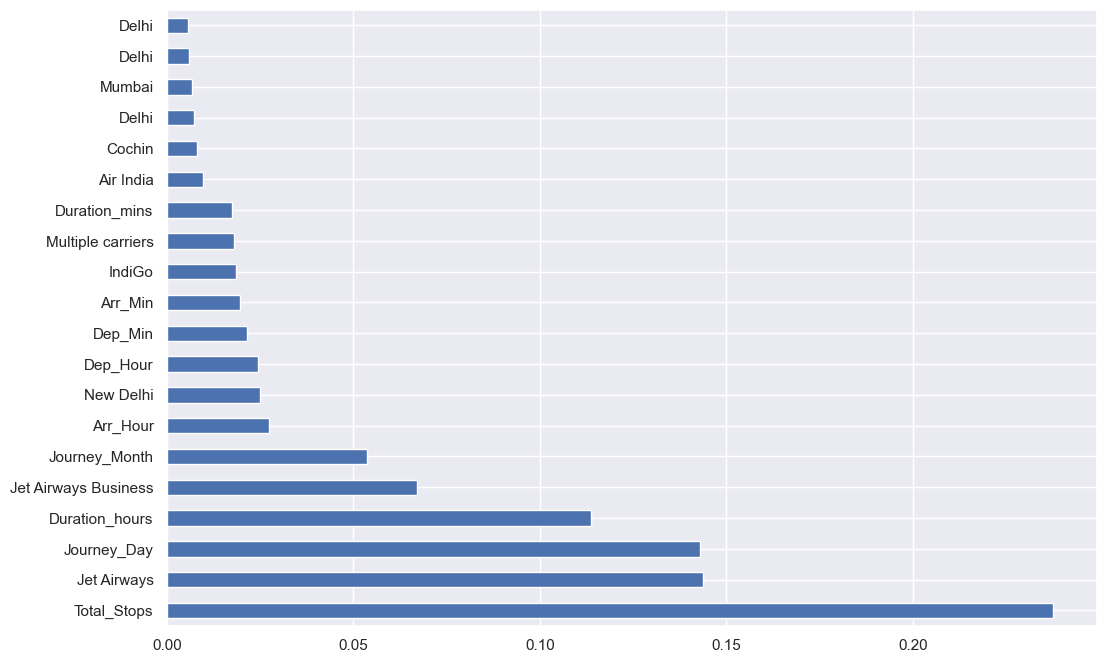

In [185]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


Fitting Model using Random Forest

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [187]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [188]:
y_pred = reg_rf.predict(X_test)

In [189]:
reg_rf.score(X_train, y_train)

0.9502828021420712

In [190]:
reg_rf.score(X_test, y_test)

0.8039332449020352

C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

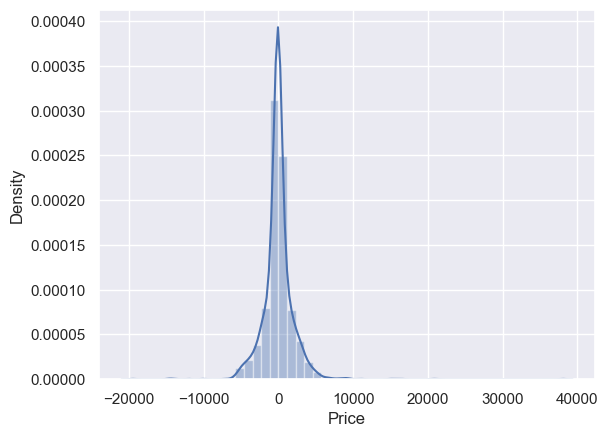

In [191]:
sns.distplot(y_test-y_pred)
plt.show()

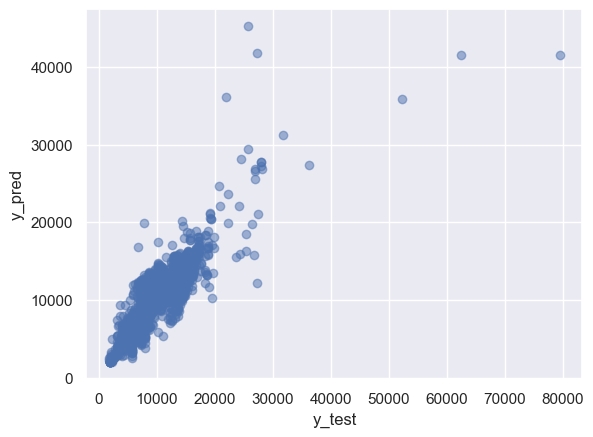

In [192]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [193]:
from sklearn import metrics

In [194]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1228.7554040280809
MSE: 4789579.042093412
RMSE: 2188.5106904224644


In [196]:
# RMSE/(max(DV)-min(DV))

2188.5106/(max(y)-min(y))

0.02814696024590691

In [197]:
metrics.r2_score(y_test, y_pred)

0.8039332449020352

Hyperparameter Training

In [198]:
from sklearn.model_selection import RandomizedSearchCV

In [199]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [200]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [201]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [202]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    validat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [203]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [204]:
prediction = rf_random.predict(X_test)

C:\Users\omgha\AppData\Local\Temp\ipykernel_15496\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.o

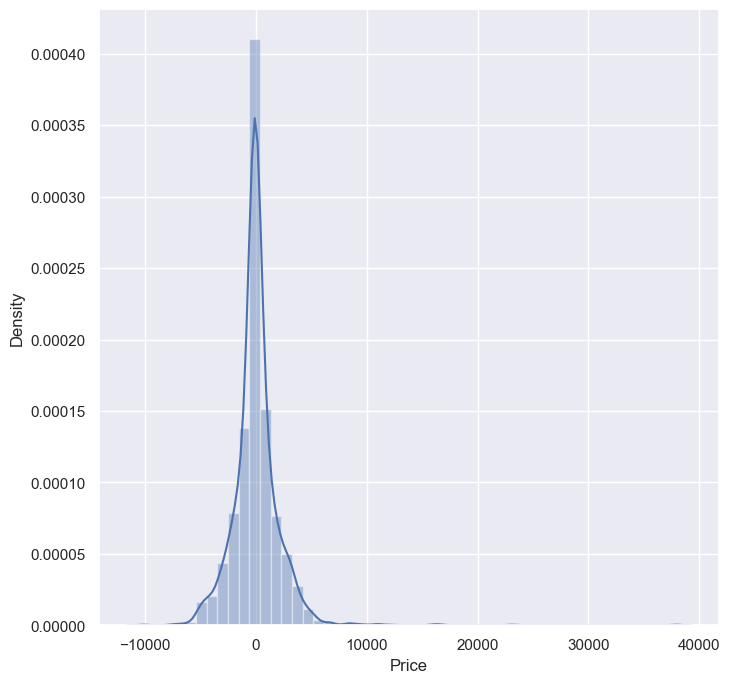

In [205]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

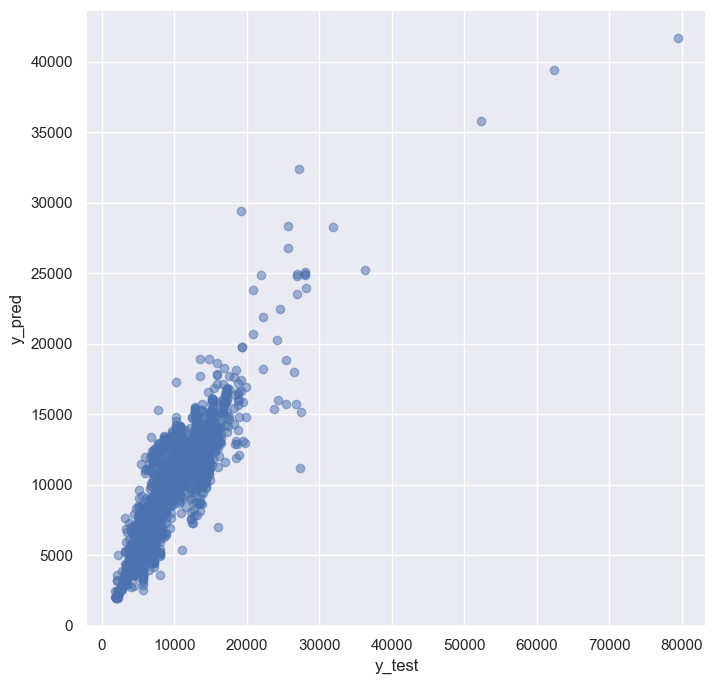

In [206]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [207]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1302.5478401051291
MSE: 4748340.001579773
RMSE: 2179.0686087362583


Save the model to reuse it again

In [208]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [209]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [210]:
y_prediction = forest.predict(X_test)

In [211]:
metrics.r2_score(y_test, y_prediction)

0.8039332449020352